In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pydicom

# A
img = pydicom.dcmread('file1.dcm')

# B
print(f'Bits Allocated: {img.BitsAllocated}')
print(f'Bits Stored: {img.BitsStored}')
print(f'Modality: {img.Modality}')
print(f'Body Part: {img.BodyPartExamined}')
l = 2**(img.BitsStored) - 1

Bits Allocated: 16
Bits Stored: 12
Modality: CT
Body Part: CHEST


(512, 512)


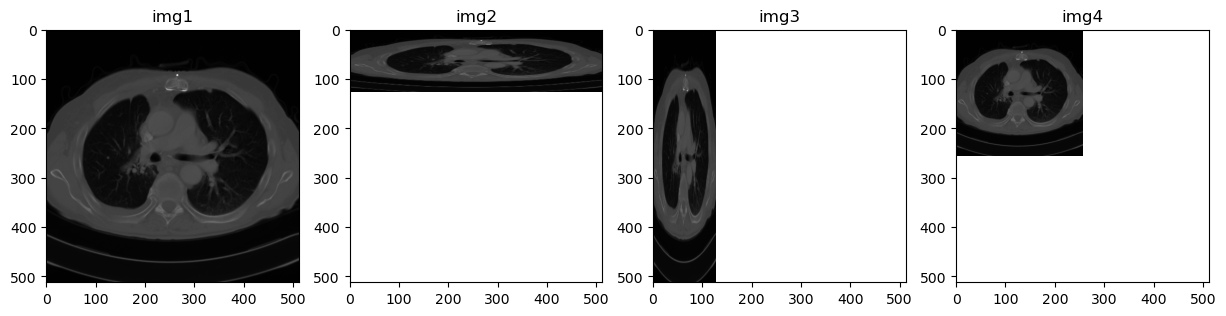

In [2]:
# C

img1 = img.pixel_array
print(img1.shape)
x,y = img1.shape
img2 = img1[::4]
img3 = img1[:, ::4]

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax = plt.subplot(1, 4, 1)
ax.set_title('img1')
ax.imshow(img1, cmap='gray', vmin=0, vmax=l)
ax.set_xlim([0, x])
ax.set_ylim([y, 0]) 

ax = plt.subplot(1, 4, 2)
ax.set_title('img2')
ax.imshow(img2, cmap='gray', vmin=0, vmax=l)
ax.set_xlim([0, x])
ax.set_ylim([y, 0]) 


ax= plt.subplot(1, 4, 3)
ax.set_title('img3')
ax.imshow(img3, cmap='gray', vmin=0, vmax=l)
ax.set_xlim([0, x])
ax.set_ylim([y, 0])

# D
img4 = img1[::2, ::2]

ax = plt.subplot(1, 4, 4)
ax.set_title('img4')
ax.imshow(img4, cmap='gray', vmin=0, vmax=l)
ax.set_xlim([0, x])
ax.set_ylim([y, 0]) 
  
plt.show()

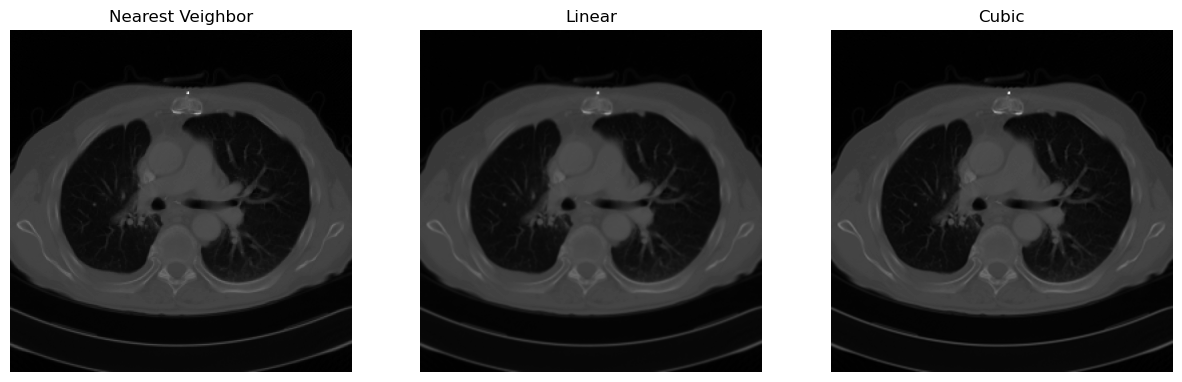

In [3]:
# F
img_stretch1 = cv.resize(img4, (0, 0), fx=2, fy=2, interpolation=cv.INTER_NEAREST)
img_stretch2 = cv.resize(img4, (0, 0), fx=2, fy=2, interpolation=cv.INTER_LINEAR)
img_stretch3 = cv.resize(img4, (0,0), fx=2, fy=2, interpolation=cv.INTER_CUBIC)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax = plt.subplot(1, 3, 1)
ax.set_title('Nearest Veighbor')
ax.imshow(img_stretch1, cmap='gray', vmin=0, vmax=l)
ax.axis('off')
  
ax = plt.subplot(1, 3, 2)
ax.set_title('Linear')
ax.imshow(img_stretch2, cmap='gray', vmin=0, vmax=l)
ax.axis('off')
  
ax = plt.subplot(1, 3, 3)
ax.set_title('Cubic')
ax.imshow(img_stretch3, cmap='gray', vmin=0, vmax=l)
ax.axis('off')

plt.show()

In [4]:
img_final = np.uint8(img4)

cv.imwrite('image.bmp', img_final)
cv.imwrite('image.tif', img_final)

True